In [2]:
import pandas as pd
import pickle
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
# Load data

articles1 = pd.read_csv("articles1.csv")
articles2 = pd.read_csv("articles2.csv")
articles3 = pd.read_csv("articles3.csv")
articles = pd.concat([articles1, articles2, articles3])

political_score_dict = {"Atlantic": -1,
                        "Breitbart": 1,
                        "Business Insider": -1,
                        "Buzzfeed News": -1,
                        "CNN": -1,
                        "Fox News": 1,
                        "Guardian": -1,
                        "NPR": -1,
                        "National Review": 1,
                        "New York Post": 1,
                        "New York Times": -1,
                        "Reuters": -1,
                        "Talking Points Memo": -1,
                        "Vox": -1,
                        "Washington Post": -1}

articles['score'] = articles['publication'].apply(lambda x: political_score_dict[x])
articles.head()

# This helps to cut down the volume of data I'm working with
articles_train, articles_test = train_test_split(articles, test_size=0.5)

uci = pd.read_csv("uci-news-aggregator.csv")
uci.columns = [k.lower() for k in uci.columns]

In [10]:
list(set(articles.publication))

['New York Times',
 'Breitbart',
 'New York Post',
 'Business Insider',
 'Guardian',
 'Reuters',
 'Buzzfeed News',
 'Vox',
 'National Review',
 'Washington Post',
 'Talking Points Memo',
 'Fox News',
 'Atlantic',
 'NPR',
 'CNN']

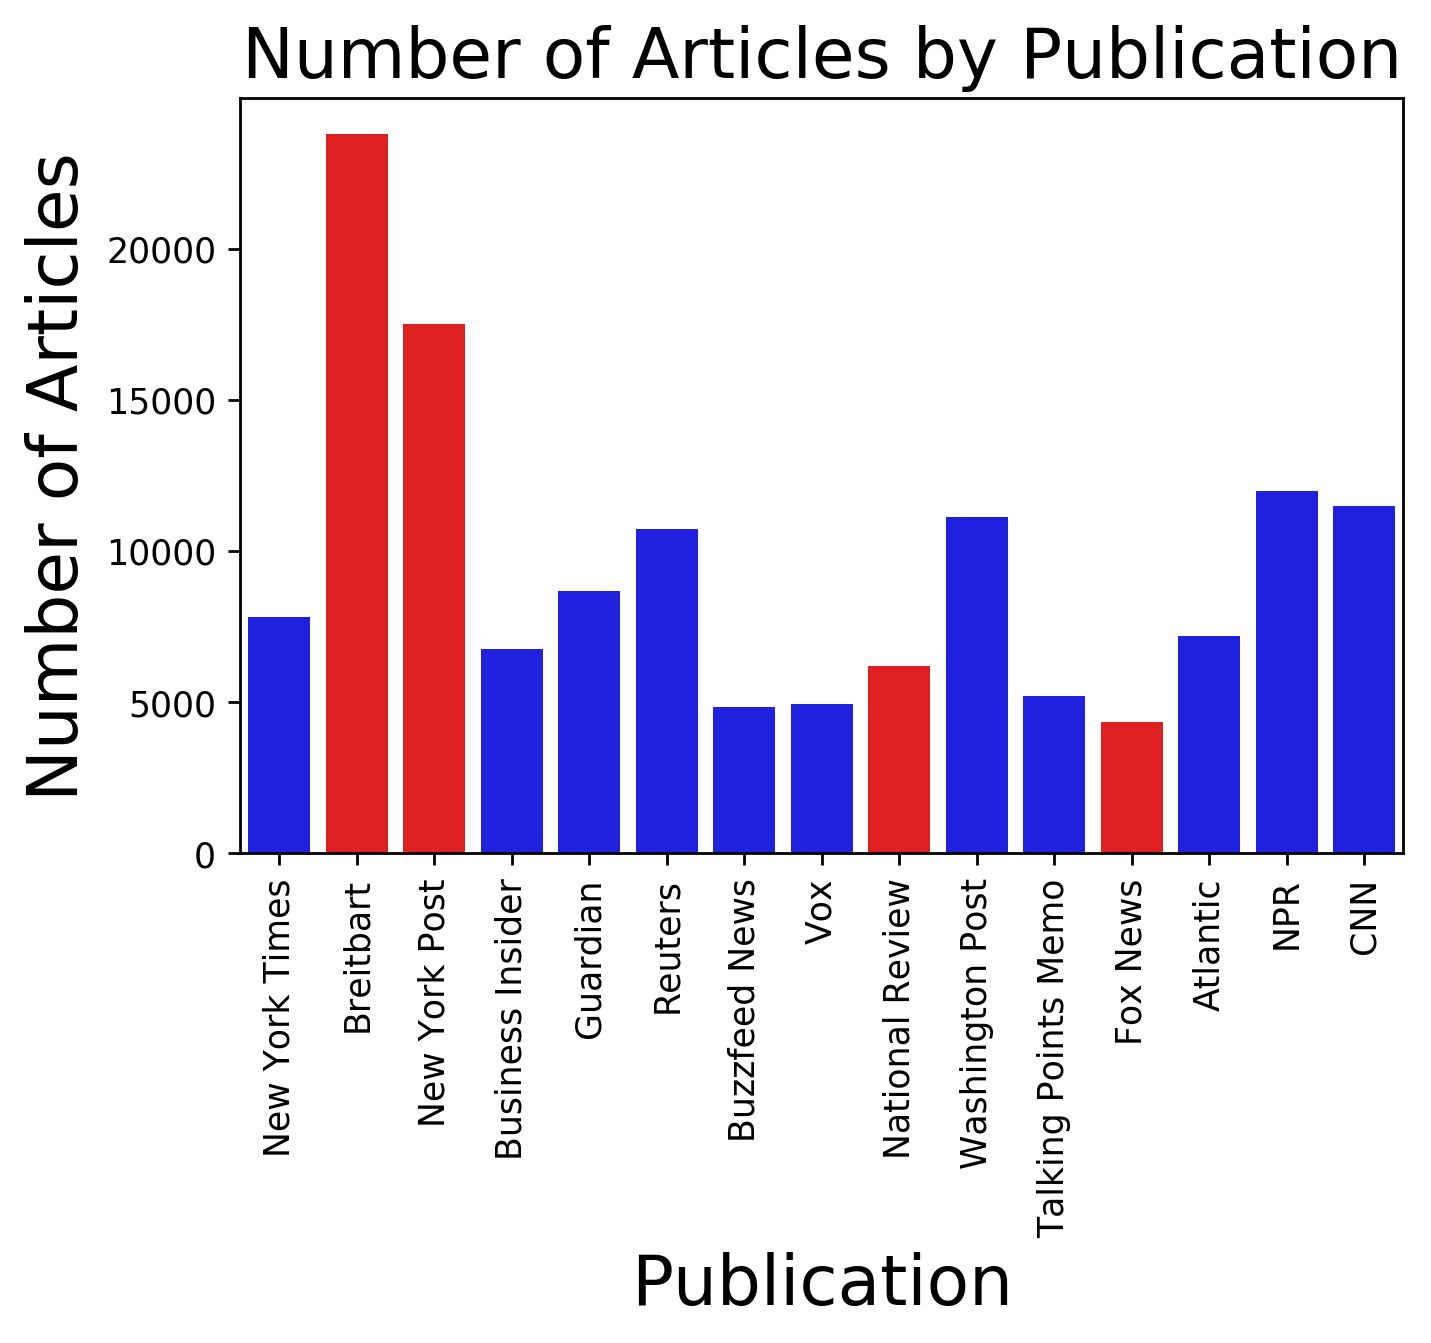

In [14]:
pubs_volume = []
for pub in set(articles.publication):
    pubs_volume.append((pub, len(articles[articles.publication == pub])))
    

vols = [k[1] for k in pubs_volume]  
pubs = [k[0] for k in pubs_volume]
pubs_volume_df = pd.DataFrame({"Publication": pubs, "Num_Articles": vols})

plt.figure(dpi=250)
clrs = {"Breitbart": "red",
        "National Review": "red",
        "Fox News": "red",
        "New York Times": "blue",
        "New York Post": "red",
        "Business Insider": "blue",
        "Guardian": "blue",
        "Reuters": "blue",
        "Buzzfeed News": "blue",
        "Vox": "blue",
        "Washington Post": "blue",
        "Talking Points Memo": "blue",
        "Atlantic": "blue",
        "NPR": "blue",
        "CNN": "blue"}
g = sns.barplot(x = "Publication", y = "Num_Articles", data=pubs_volume_df, palette=clrs) #, color="salmon")
plt.ylabel("Number of Articles", fontsize=20)
plt.xlabel("Publication", fontsize=20)
plt.title("Number of Articles by Publication", fontsize=20)

plt.xticks(rotation=90);

plt.savefig("pub_vol2.png", bbox_inches='tight', pad_inches=0.6)

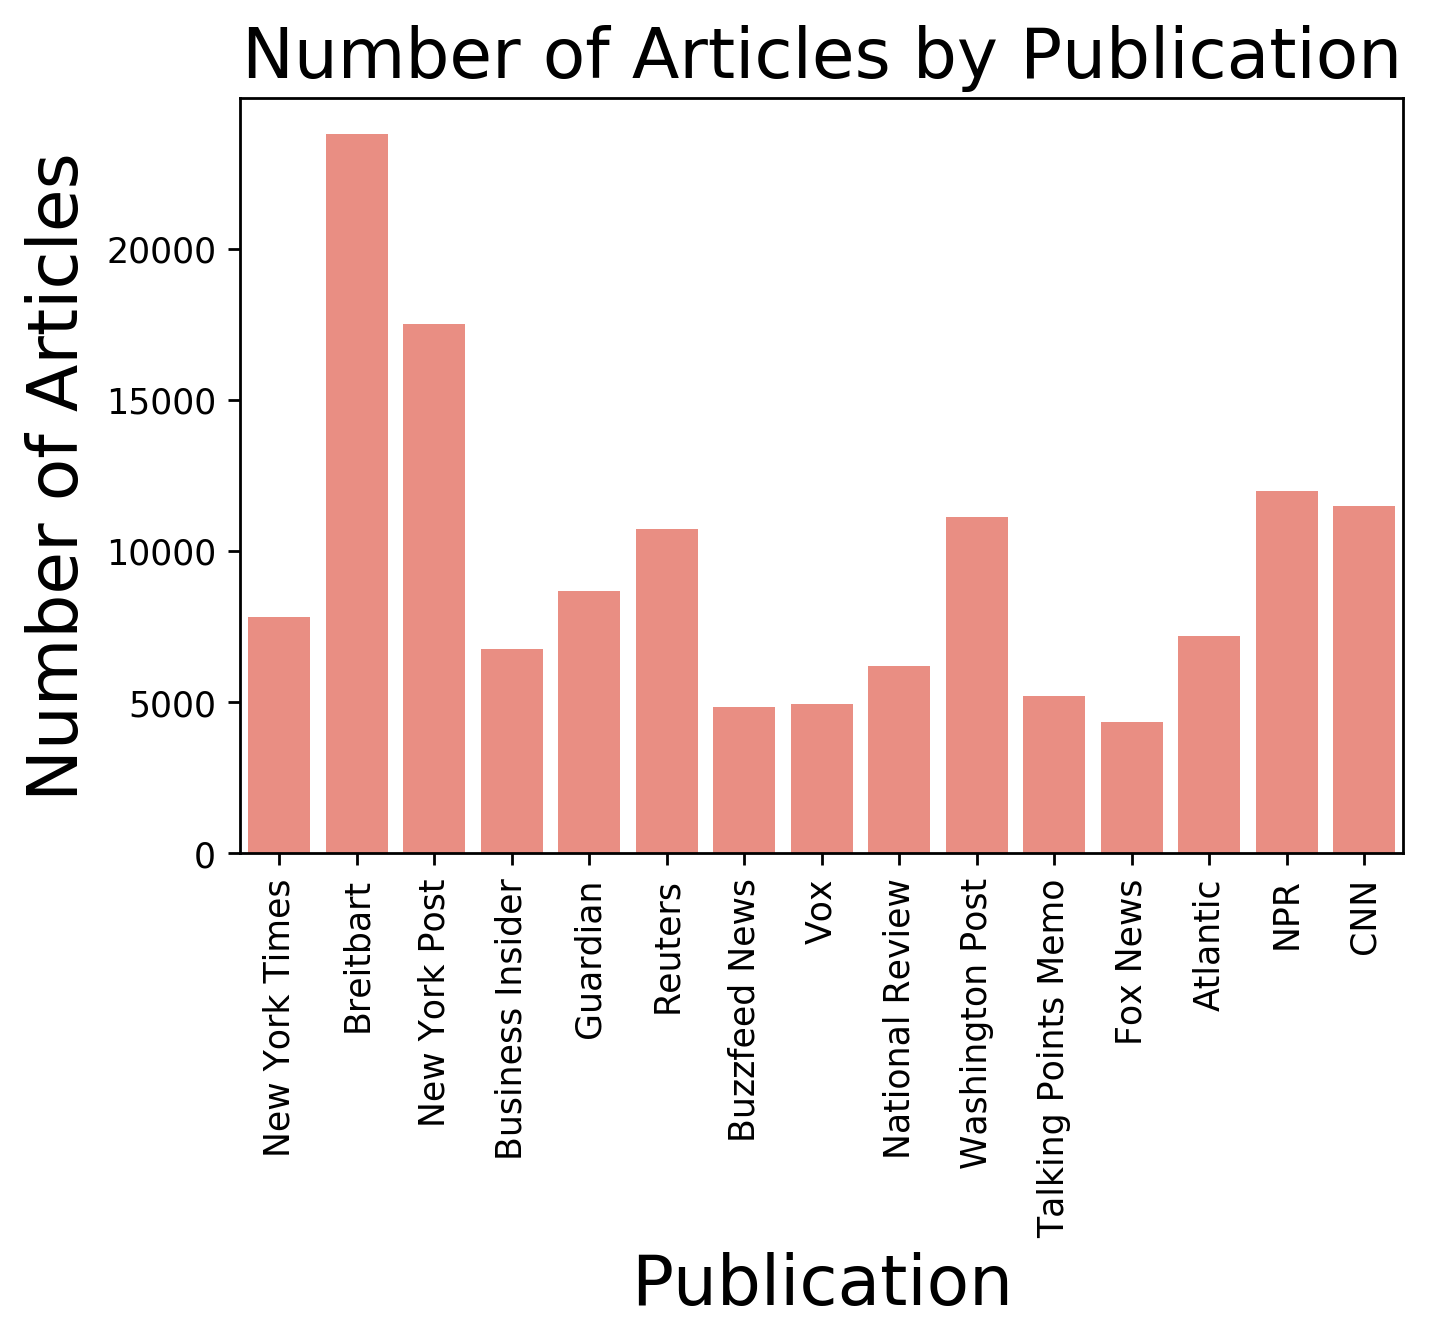

In [16]:
plt.figure(dpi=250)
clrs = {"Breitbart": "salmon",
        "National Review": "salmon",
        "Fox News": "salmon",
        "New York Times": "salmon",
        "New York Post": "salmon",
        "Business Insider": "salmon",
        "Guardian": "salmon",
        "Reuters": "salmon",
        "Buzzfeed News": "salmon",
        "Vox": "salmon",
        "Washington Post": "salmon",
        "Talking Points Memo": "salmon",
        "Atlantic": "salmon",
        "NPR": "salmon",
        "CNN": "salmon"}
g = sns.barplot(x = "Publication", y = "Num_Articles", data=pubs_volume_df, palette=clrs) #, color="salmon")
plt.ylabel("Number of Articles", fontsize=20)
plt.xlabel("Publication", fontsize=20)
plt.title("Number of Articles by Publication", fontsize=20)

plt.xticks(rotation=90);

plt.savefig("pub_vol1.png", bbox_inches='tight', pad_inches=0.6)

In [5]:
import pickle

with open("lsa_cv_word_freq.pickle", "rb") as f:
    lsa_cv_word_freq = pickle.load(f)

In [6]:
words = [k[0] for k in lsa_cv_word_freq]
score = [k[1] for k in lsa_cv_word_freq]
freq = [k[2] for k in lsa_cv_word_freq]

In [7]:
df = pd.DataFrame({"words": words, "score": score, "freq": freq})
df.to_csv("word_freq.csv")

In [17]:
def get_num_sentences(article):
    stoppers = [".", "!", "?"]
    num_sentences = 0
    for k in stoppers:
        num_sentences += article.count(k)
    return num_sentences
        
        
def get_num_words(article):
    return len(article.split(" "))


def get_avg_word_length(article):
    fillers = list(".,!?:'-()/")
    for k in fillers:
        article = article.replace(k, "")
    article = article.replace('"', '')    
    all_words = article.split(" ")
    avg_word_length = np.average([len(k) for k in all_words])
    avg_word_length = np.round(avg_word_length, 1)
    return avg_word_length
    
    
def get_adjective_count(article):
    data = nltk.word_tokenize(article)
    categories = nltk.pos_tag(data)
    return len([k[1] for k in example if "JJ" in k])


def get_pub_dict():
    pub_dict = {}

    for pub in set(articles_train.publication):
        pub_df = articles_train[articles_train.publication == pub]
        pub_data = zip(pub_df.date, pub_df.title, pub_df.content)
        pub_dict[pub] = pub_data
        
    return pub_dict   

In [20]:
avg_words_sentences_dict = {}
pub_dict = get_pub_dict()
publications = pub_dict.keys()


for pub in publications:
    pub_articles = [k[2] for k in pub_dict[pub]]
    
    avg_sentences = np.average([get_num_sentences(k) for k in pub_articles])
    avg_sentences = np.round(avg_sentences, 1)
    
    avg_words = np.average([get_num_words(k) for k in pub_articles])
    avg_words = np.round(avg_words, 1)
    
    avg_word_length = np.average([get_avg_word_length(k) for k in pub_articles])
    avg_word_length = np.round(avg_word_length, 1)
    
    avg_words_sentences_dict[pub] = (avg_sentences, avg_words, avg_word_length)

In [21]:
avg_words_sentences_dict

{'National Review': (51.4, 997.7, 4.7),
 'Fox News': (31.8, 564.3, 4.6),
 'New York Post': (24.9, 461.9, 4.4),
 'Business Insider': (23.9, 516.3, 3.9),
 'Guardian': (46.1, 952.3, 4.6),
 'CNN': (39.0, 738.0, 4.6),
 'Breitbart': (27.0, 521.7, 4.7),
 'Reuters': (36.9, 696.8, 4.7),
 'New York Times': (76.1, 1188.4, 4.6),
 'Buzzfeed News': (43.0, 886.6, 4.6),
 'Washington Post': (60.1, 1091.7, 4.5),
 'Talking Points Memo': (21.2, 378.2, 4.7),
 'NPR': (46.8, 802.2, 4.6),
 'Vox': (64.4, 1433.0, 4.4),
 'Atlantic': (69.8, 1380.6, 4.6)}

In [27]:
avg_word_sentences_vals = list(avg_words_sentences_dict.values())

publications = list(publications)
score = [political_score_dict[p] for p in publications]
avg_sent_length = [k[0] for k in avg_word_sentences_vals]
avg_words = [k[1] for k in avg_word_sentences_vals]
avg_word_length = [k[2] for k in avg_word_sentences_vals]

In [29]:
syntax_df = pd.DataFrame({"publication": publications, 
                          "score": score,
                          "sentence_length": avg_sent_length,
                          "num_words": avg_words,
                          "word_length": avg_word_length})

In [30]:
syntax_df.to_csv("syntax_stats.csv")